# Absorption / EQE Profile Comparison - Marcus vs. MLJ Theory

### Important Paper https://doi.org/10.1039/C8MH00564H

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from mpmath import nsum, exp, inf
import math

#### Parameters & Variables

In [14]:
k = 1.38064852*10**(-23) #[m2*kg/(s2*K)]
k_eV = 8.617333262145*10**(-5) #[eV/K]
hbar = 1.0545718*10**(-34) #[m2*kg / s]
hbar_eV = 6.5821*10**(-16) #[eV/s] 

In [108]:
lam = 0.3 #[eV]
lam_o = 0.5*0.3 #[eV]
hbar_w_i = 0.165 #[eV]
S_i = 1
sig = 0.05 #[eV]

##### !!! Go through the derivation of these equations again !!!

### Marcus Theory - EQE Profile

In [21]:
def EQE_Marcus(E, E_CT, l, T): # E - Energy list [eV]
    EQE_Marcus_list = []
    for e in E:
        EQE = 1/(e*math.sqrt(4*math.pi*k_eV*l*T)) * math.exp(-((-e+E_CT+l)**2) / (4*l*k_eV*T))
        EQE_Marcus_list.append(EQE)
        
    return EQE_Marcus_list

##### Including Disorder

In [61]:
def EQE_Marcus_disorder(E, E_CT, l, T, sig): # Make sure that this equation is correct
    EQE_Marcus_disorder_list = []
    for e in E:
        EQE = 1/(e*math.sqrt(4*math.pi*k_eV*l*T + 2*math.pi*sig**2)) * math.exp(-((-e+E_CT+l)**2) / (4*l*k_eV*T + 2*sig**2))
        EQE_Marcus_disorder_list.append(EQE)
        
    return EQE_Marcus_disorder_list

### MLJ Theory - EQE Profile

In [1]:
def EQE_MLJ(E, E_CT, l_o, S_i, hbar_w_i, T): # Make sure that the prefactor is correct
    EQE_MLJ_list = []
    for e in E:
        EQE = 1/(e*math.sqrt(4*math.pi*k_eV*l_o*T)) \
        * nsum(lambda v: (math.exp(-S_i)*S_i**v / (math.factorial(v))) \
        * math.exp(-((-e+E_CT+l_o+v*hbar_w_i)**2) / (4*l_o*k_eV*T)), [0, inf])
        EQE_MLJ_list.append(EQE)
        
    return EQE_MLJ_list   

##### Including Disorder

In [24]:
def EQE_MLJ_disorder(E, E_CT, l_o, S_i, hbar_w_i, T, sig): # Make sure that the prefactor/disorder factor is correct
    EQE_MLJ_disorder_list = []
    for e in E:
        EQE = 1/(e*math.sqrt(4*math.pi*k_eV*l_o*T + 2*sig**2)) \
        * nsum(lambda v: (math.exp(-S_i)*S_i**v / (math.factorial(v))) \
        * math.exp(-((-e+E_CT+l_o+v*hbar_w_i)**2) / (4*l*k_eV*T + 2*sig**2)), [0, inf])
        EQE_MLJ_disorder_list.append(EQE)
        
    return EQE_MLJ_disorder_list   

### Exploring Parameters

In [41]:
Energy_list = np.arange(1,2.6, 0.01)

#### Marcus Theory - Without Disorder

##### Dependence on ECT

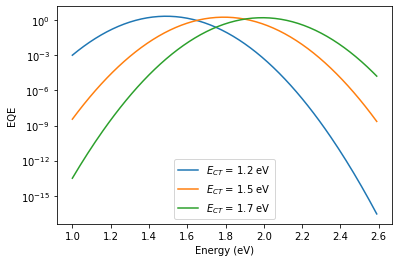

In [42]:
ECT_list = [1.2, 1.5, 1.7]

for ECT in ECT_list:
    EQE_Marcus_ECT = EQE_Marcus(Energy_list, ECT, lam, 300)
    plt.semilogy(Energy_list, EQE_Marcus_ECT, label='$E_{CT}$ = '+str(ECT)+' eV')
    
plt.xlabel('Energy (eV)')
plt.ylabel('EQE')
plt.legend()
plt.show()

##### Dependence on Reorganization Energy

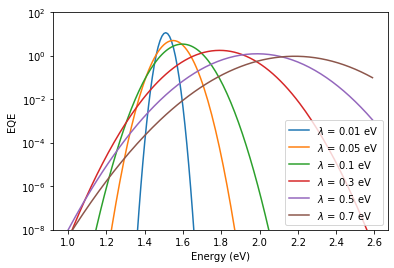

In [50]:
lam_list = [0.01, 0.05, 0.1, 0.3, 0.5, 0.7]

for l in lam_list:
    EQE_Marcus_l = EQE_Marcus(Energy_list, 1.5, l, 300)
    plt.semilogy(Energy_list, EQE_Marcus_l, label='$\lambda$ = '+str(l)+' eV')
    #plt.semilogy(-Energy_list+1.5, EQE_Marcus_ECT, label='$\lambda$ = '+str(l)+' eV')

plt.ylim(10**(-8), 10**(2))
plt.xlabel('Energy (eV)')
plt.ylabel('EQE')
plt.legend()
plt.show()

##### Dependence on Temperature

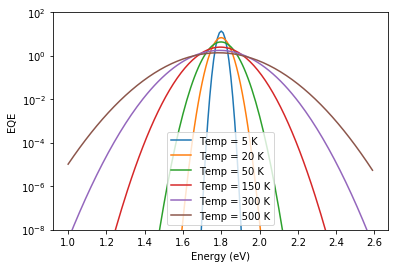

In [101]:
T_list = [5, 20, 50, 150, 300, 500]

for t in T_list:
    EQE_Marcus_T = EQE_Marcus(Energy_list, 1.5, lam, t)
    plt.semilogy(Energy_list, EQE_Marcus_T, label='Temp = '+str(t)+' K')

plt.ylim(10**(-8), 10**(2))
plt.xlabel('Energy (eV)')
plt.ylabel('EQE')
plt.legend()
plt.show()

#### Marcus Theory - Including Disorder

##### Dependence on ECT

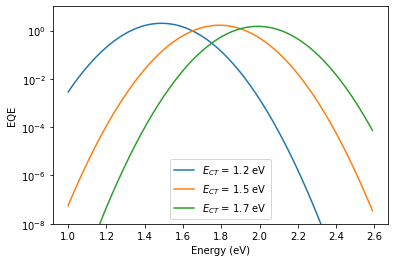

In [109]:
ECT_list = [1.2, 1.5, 1.7]

for ECT in ECT_list:
    EQE_Marcus_disorder_ECT = EQE_Marcus_disorder(Energy_list, ECT, lam, 300, sig)
    plt.semilogy(Energy_list, EQE_Marcus_disorder_ECT, label='$E_{CT}$ = '+str(ECT)+' eV')

plt.ylim(10**(-8), 10**(1))
plt.xlabel('Energy (eV)')
plt.ylabel('EQE')
plt.legend()
plt.show()

##### Dependence on Disorder

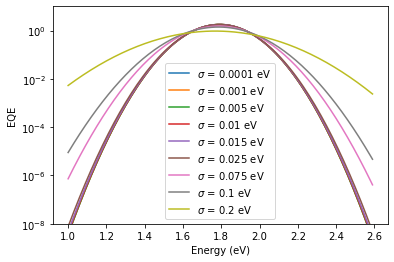

In [69]:
sig_list = [0.0001, 0.001, 0.005, 0.01, 0.015, 0.025, 0.075, 0.1, 0.2]

for s in sig_list:
    EQE_Marcus_disorder_sig = EQE_Marcus_disorder(Energy_list, 1.5, lam, 300, s)
    plt.semilogy(Energy_list, EQE_Marcus_disorder_sig, label='$\sigma$ = '+str(s)+' eV')

plt.ylim(10**(-8), 10**(1))
plt.xlabel('Energy (eV)')
plt.ylabel('EQE')
plt.legend()
plt.show()

##### Dependence on Temperature

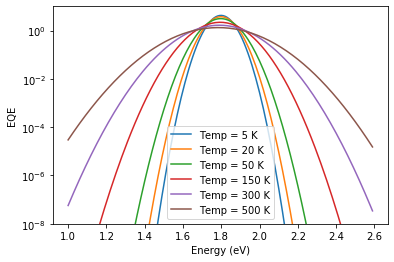

In [100]:
T_list = [5, 20, 50, 150, 300, 500]

for t in T_list:
    EQE_Marcus_disorder_T = EQE_Marcus_disorder(Energy_list, 1.5, lam, t, sig)
    plt.semilogy(Energy_list, EQE_Marcus_disorder_T, label='Temp = '+str(t)+' K')

plt.ylim(10**(-8), 10**(1))
plt.xlabel('Energy (eV)')
plt.ylabel('EQE')
plt.legend()
plt.show()

#### MLJ Theory - Without Disorder

In [87]:
Energy_list_2 = np.arange(0.01, 3.6, 0.01)

##### Dependence on ECT

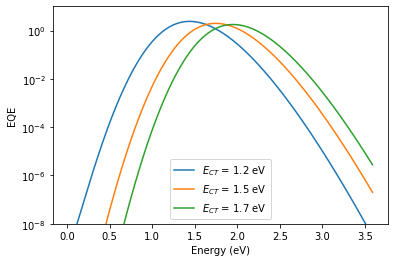

In [88]:
ECT_list = [1.2, 1.5, 1.7]

for ECT in ECT_list:
    EQE_MLJ_ECT = EQE_MLJ(Energy_list_2, ECT, lam_o, S_i, hbar_w_i, 300)
    plt.semilogy(Energy_list_2, EQE_MLJ_ECT, label='$E_{CT}$ = '+str(ECT)+' eV')

plt.ylim(10**(-8), 10**(1))
plt.xlabel('Energy (eV)')
plt.ylabel('EQE')
plt.legend()
plt.show()

##### Dependence on Temperature

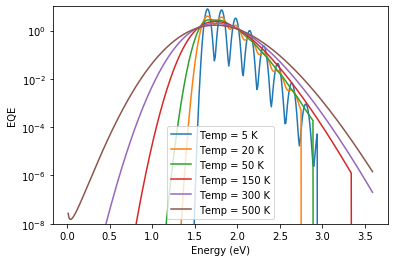

In [89]:
T_list = [5, 20, 50, 150, 300, 500]

for t in T_list:
    EQE_MLJ_T = EQE_MLJ(Energy_list_2, 1.5, lam_o, S_i, hbar_w_i, t)
    plt.semilogy(Energy_list_2, EQE_MLJ_T, label='Temp = '+str(t)+' K')

plt.ylim(10**(-8), 10**(1))
plt.xlabel('Energy (eV)')
plt.ylabel('EQE')
plt.legend()
plt.show()

##### Dependence on (External) Reorganization Energy

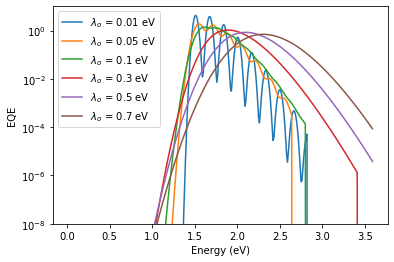

In [110]:
lam_list = [0.01, 0.05, 0.1, 0.3, 0.5, 0.7]

for l in lam_list:
    EQE_MLJ_l = EQE_MLJ(Energy_list_2, 1.5, l, S_i, hbar_w_i, 300)
    plt.semilogy(Energy_list_2, EQE_MLJ_l, label='$\lambda_o$ = '+str(l)+' eV')

plt.ylim(10**(-8), 10**(1))
plt.xlabel('Energy (eV)')
plt.ylabel('EQE')
plt.legend()
plt.show()

##### Dependence on Huang-Rhys Parameter

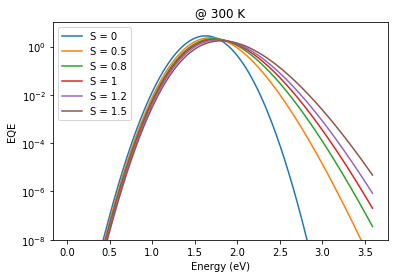

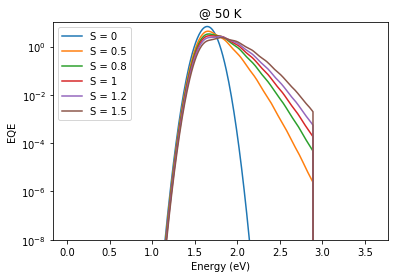

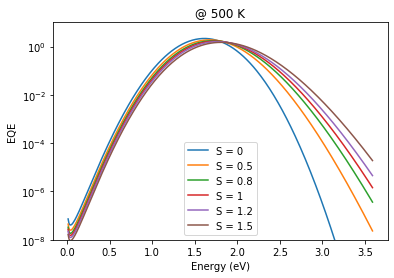

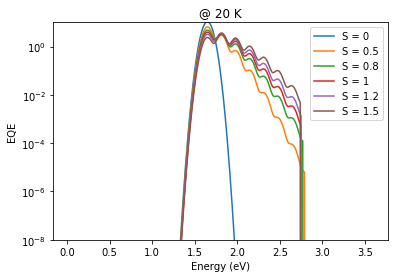

In [112]:
S_list = [0, 0.5, 0.8, 1, 1.2, 1.5]

for S in S_list:
    EQE_MLJ_S = EQE_MLJ(Energy_list_2, 1.5, lam_o, S, hbar_w_i, 300)
    plt.semilogy(Energy_list_2, EQE_MLJ_S, label='S = '+str(S))
plt.ylim(10**(-8), 10**(1))
plt.xlabel('Energy (eV)')
plt.ylabel('EQE')
plt.title('@ 300 K')
plt.legend()
plt.show()

for S in S_list:
    EQE_MLJ_S = EQE_MLJ(Energy_list_2, 1.5, lam_o, S, hbar_w_i, 50)
    plt.semilogy(Energy_list_2, EQE_MLJ_S, label='S = '+str(S))
plt.ylim(10**(-8), 10**(1))
plt.xlabel('Energy (eV)')
plt.ylabel('EQE')
plt.title('@ 50 K')
plt.legend()
plt.show()

for S in S_list:
    EQE_MLJ_S = EQE_MLJ(Energy_list_2, 1.5, lam_o, S, hbar_w_i, 500)
    plt.semilogy(Energy_list_2, EQE_MLJ_S, label='S = '+str(S))
plt.ylim(10**(-8), 10**(1))
plt.xlabel('Energy (eV)')
plt.ylabel('EQE')
plt.title('@ 500 K')
plt.legend()
plt.show()

for S in S_list:
    EQE_MLJ_S = EQE_MLJ(Energy_list_2, 1.5, lam_o, S, hbar_w_i, 20)
    plt.semilogy(Energy_list_2, EQE_MLJ_S, label='S = '+str(S))
plt.ylim(10**(-8), 10**(1))
plt.xlabel('Energy (eV)')
plt.ylabel('EQE')
plt.title('@ 20 K')
plt.legend()
plt.show()

##### Dependence on Vibrational Quanta

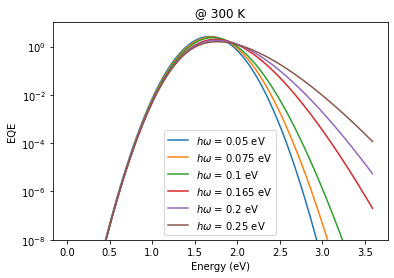

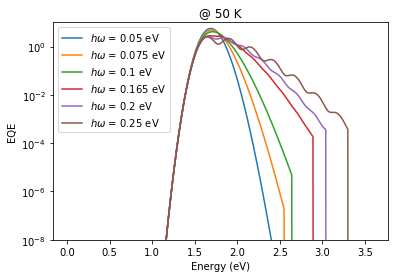

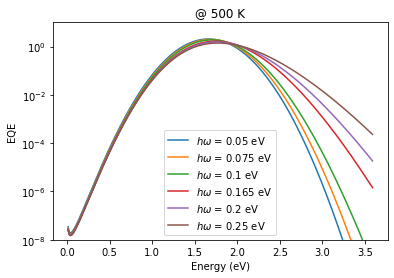

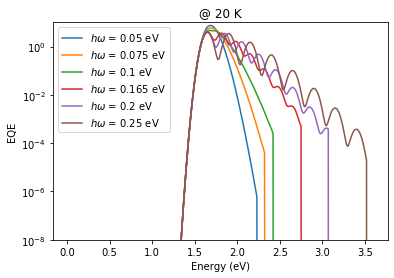

In [113]:
vib_Quant_list = [0.05, 0.075, 0.1, 0.165, 0.2, 0.25]

for vib in vib_Quant_list:
    EQE_MLJ_vib = EQE_MLJ(Energy_list_2, 1.5, lam_o, S_i, vib, 300)
    plt.semilogy(Energy_list_2, EQE_MLJ_vib, label='$h\omega$ = '+str(vib)+' eV')
plt.ylim(10**(-8), 10**(1))
plt.xlabel('Energy (eV)')
plt.ylabel('EQE')
plt.title('@ 300 K')
plt.legend()
plt.show()

for vib in vib_Quant_list:
    EQE_MLJ_vib = EQE_MLJ(Energy_list_2, 1.5, lam_o, S_i, vib, 50)
    plt.semilogy(Energy_list_2, EQE_MLJ_vib, label='$h\omega$ = '+str(vib)+' eV')
plt.ylim(10**(-8), 10**(1))
plt.xlabel('Energy (eV)')
plt.ylabel('EQE')
plt.title('@ 50 K')
plt.legend()
plt.show()

for vib in vib_Quant_list:
    EQE_MLJ_vib = EQE_MLJ(Energy_list_2, 1.5, lam_o, S_i, vib, 500)
    plt.semilogy(Energy_list_2, EQE_MLJ_vib, label='$h\omega$ = '+str(vib)+' eV')
plt.ylim(10**(-8), 10**(1))
plt.xlabel('Energy (eV)')
plt.ylabel('EQE')
plt.title('@ 500 K')
plt.legend()
plt.show()

for vib in vib_Quant_list:
    EQE_MLJ_vib = EQE_MLJ(Energy_list_2, 1.5, lam_o, S_i, vib, 20)
    plt.semilogy(Energy_list_2, EQE_MLJ_vib, label='$h\omega$ = '+str(vib)+' eV')
plt.ylim(10**(-8), 10**(1))
plt.xlabel('Energy (eV)')
plt.ylabel('EQE')
plt.title('@ 20 K')
plt.legend()
plt.show()

#### MLJ Theory - Including Disorder

##### Dependence on ECT

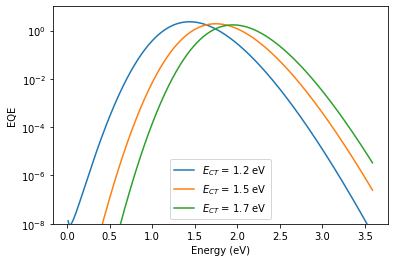

In [106]:
ECT_list = [1.2, 1.5, 1.7]

for ECT in ECT_list:
    EQE_MLJ_disorder_ECT = EQE_MLJ_disorder(Energy_list_2, ECT, lam_o, S_i, hbar_w_i, 300, sig)
    plt.semilogy(Energy_list_2, EQE_MLJ_disorder_ECT, label='$E_{CT}$ = '+str(ECT)+' eV')

plt.ylim(10**(-8), 10**(1))
plt.xlabel('Energy (eV)')
plt.ylabel('EQE')
plt.legend()
plt.show()

##### Dependence on Disorder

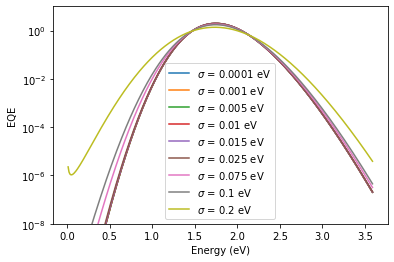

In [104]:
sig_list_2 = [0.0001, 0.001, 0.005, 0.01, 0.015, 0.025, 0.075, 0.1, 0.2]

for s in sig_list_2:
    EQE_MLJ_disorder_sig = EQE_MLJ_disorder(Energy_list_2, 1.5, lam_o, S_i, hbar_w_i, 300, s)
    plt.semilogy(Energy_list_2, EQE_MLJ_disorder_sig, label='$\sigma$ = '+str(s)+' eV')

plt.ylim(10**(-8), 10**(1))
plt.xlabel('Energy (eV)')
plt.ylabel('EQE')
plt.legend()
plt.show()

##### Dependence on Temperature

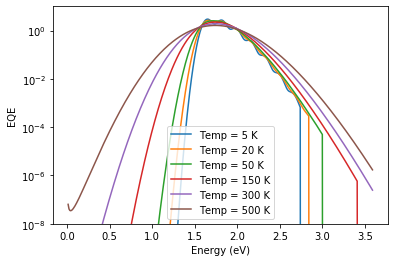

In [102]:
T_list = [5, 20, 50, 150, 300, 500]

for t in T_list:
    EQE_MLJ_disorder_T = EQE_MLJ_disorder(Energy_list_2, 1.5, lam_o, S_i, hbar_w_i, t, sig)
    plt.semilogy(Energy_list_2, EQE_MLJ_disorder_T, label='Temp = '+str(t)+' K')

plt.ylim(10**(-8), 10**(1))
plt.xlabel('Energy (eV)')
plt.ylabel('EQE')
plt.legend()
plt.show()